# k近邻算法
- 思想简单
- 应用数学知识少
- 效果好
- 可以解释机器学习算法过程中的许多细节问题
- 可以完整地刻画机器学习的应用流程

k = n

根据新样本附近n个样本的标签值确定新样本的标签值，**分类算法**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
raw_data_x = np.random.normal(5, 10, 100).reshape(50,2)
#raw_data_x

In [13]:
raw_data_y = np.random.randint(2, size = 50)
raw_data_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1])

In [14]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

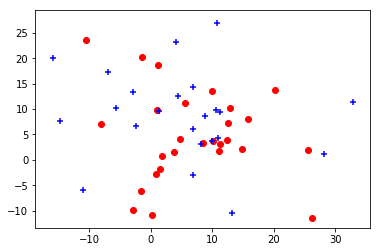

In [15]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = 'red', marker = 'o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = 'blue', marker = '+')
plt.show()

In [62]:
x = np.random.normal(5,10,10).reshape(-1,2)

In [63]:
x

array([[ 5.6527976 ,  8.35699427],
       [-4.6990444 , 28.71496221],
       [16.13259316,  8.28683735],
       [ 6.47562752,  5.37563952],
       [ 1.36590217,  1.52922726]])

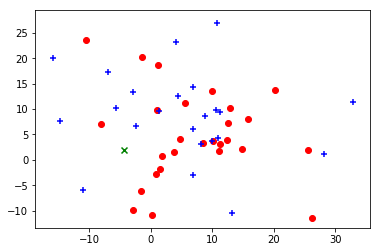

In [60]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = 'red', marker = 'o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = 'blue', marker = '+')
plt.scatter(x[0],x[1], color = 'green', marker = 'x')
plt.show()

# kNN的过程

In [61]:
from math import sqrt
distance = []
for xx_train in x_train:
    # distance.append(np.square((x[0]-xx_train[0])**2 + (x[1]-xx_train[1])**2))
    d = sqrt(np.sum((xx_train - x)**2))
    distance.append(d)
#distance

In [52]:
distance = [sqrt(np.sum((xx_train - x)**2)) for xx_train in x_train]
#distance

In [53]:
nearest = np.argsort(distance)         # 找到距离最近的索引项

In [54]:
k = 7                            # 按照附近7个点

In [55]:
topk_y = [y_train[i] for i in nearest[:k]]              #附近7个点的标签值

In [56]:
topk_y

[1, 0, 1, 0, 0, 1, 0]

In [57]:
from collections import Counter
Counter(topk_y)                                  # 计数

Counter({1: 3, 0: 4})

In [32]:
votes = Counter(topk_y)
votes.most_common(2)

[(0, 4), (1, 3)]

In [35]:
predict_y = votes.most_common(1)[0][0]

In [36]:
predict_y

0

# 机器学习算法

In [40]:
from sklearn.neighbors import KNeighborsClassifier          # 加载

In [41]:
kNN_classifier  = KNeighborsClassifier(n_neighbors = 7)              # 新建一个算法模型实例对象

In [43]:
kNN_classifier.fit(x_train, y_train)                         # 输入训练集

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [64]:
kNN_classifier.predict(x.reshape(-1,2))     # 这里x需要为二维矩阵，（1 * 2） ；预测

array([1, 1, 0, 1, 0])